In [60]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file

In [61]:
from sklearn.datasets import load_svmlight_file

In [62]:
data=load_svmlight_file('australian_scale.txt')
X=data[0].todense()
y=data[1]

In [63]:
X_train,X_validation,y_train,y_validation=train_test_split(X,y,test_size=0.2,random_state=100)

In [64]:
#x转为列向量
X_train=X_train.T
X_validation=X_validation.T
#x_0 = 1
x_0=np.ones(X_train.shape[1])
X_train=np.row_stack((X_train,x_0))
x_0=np.ones(X_validation.shape[1])
X_validation=np.row_stack((X_validation,x_0))
y_train=np.mat(y_train)
y_validation=np.mat(y_validation)

In [65]:
def Loss(x,y,w):
    loss=0
    for i in range(x.shape[1]):
        if (1-y[0,i]*(w.T*x[:,i]))>0:
            loss+=1-y[0,i]*(w.T*x[:,i])
    loss+=(w.T*w)/2
    return loss[0,0]

In [66]:
def accuracy(x,y,w):
    correct=0
    for i in range(x.shape[1]):
        if (y[0,i]*(w.T*x[:,i]))>0:
            correct+=1
    return correct/float(x.shape[1])

In [67]:
def compute_gradient(w_current,x,y,learning_rate):
    w_gradient=np.zeros(x.shape[0])
    w_gradient=np.mat(w_gradient).T
    for i in range(x.shape[1]):
        if (1-y[0,i]*(w_current.T*x[:,i]))>0:
            w_gradient+=-y[0,i]*x[:,i]

    w_gradient+=w_current
    
    new_w=w_current-learning_rate*w_gradient
    return new_w

In [74]:
#初始化参数
W=np.ones(X_train.shape[0]) 
W=np.mat(W).T

learning_rate=0.0001
num_iter=2000
Loss_train=[]
Loss_validation=[]
accuracy_train=[]
accuracy_validation=[]

Loss_train.append(Loss(X_train,y_train,W))
Loss_validation.append(Loss(X_validation,y_validation,W))
accuracy_train.append(accuracy(X_train,y_train,W))
accuracy_validation.append(accuracy(X_validation,y_validation,W))
for i in range(num_iter):
    W=compute_gradient(W,X_train,y_train,learning_rate)
    Loss_train.append(Loss(X_train,y_train,W))
    Loss_validation.append(Loss(X_validation,y_validation,W))
    accuracy_train.append(accuracy(X_train,y_train,W))
    accuracy_validation.append(accuracy(X_validation,y_validation,W))
    

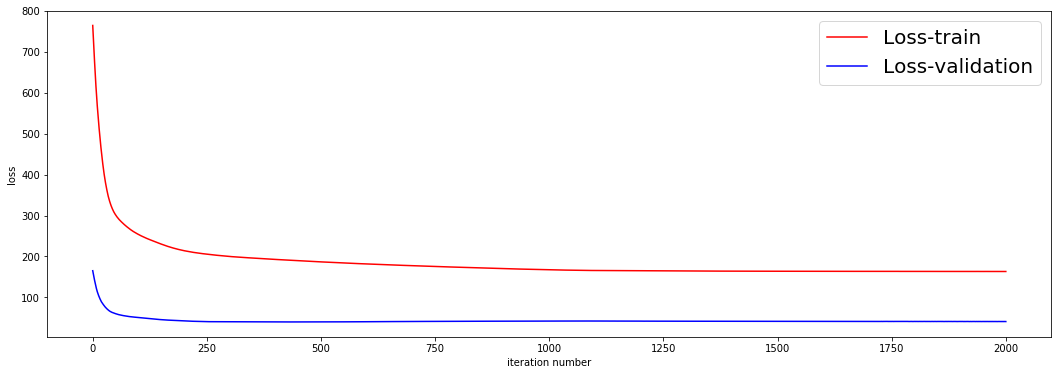

In [75]:
plt.figure(figsize=(18,6))
plt.plot(Loss_train,color='red',label='Loss-train')
plt.plot(Loss_validation,color='blue',label='Loss-validation')
plt.xlabel('iteration number')
plt.ylabel('loss')
plt.legend(fontsize=20)
plt.show()

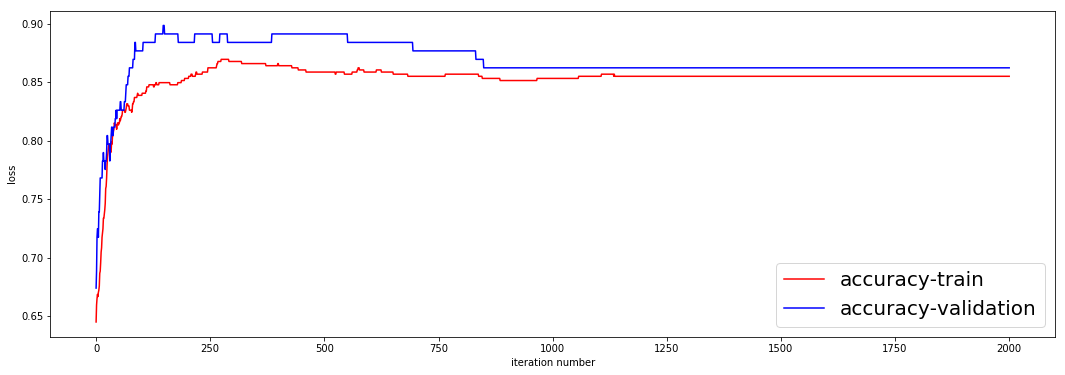

In [78]:
plt.figure(figsize=(18,6))
plt.plot(accuracy_train,color='red',label='accuracy-train')
plt.plot(accuracy_validation,color='blue',label='accuracy-validation')
plt.xlabel('iteration number')
plt.ylabel('loss')
plt.legend(fontsize=20)
plt.show()
